# Bivariate Analysis (Analysis within Multiple Variables).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from copy import copy

In [3]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


#### Find Correlation for all columns.

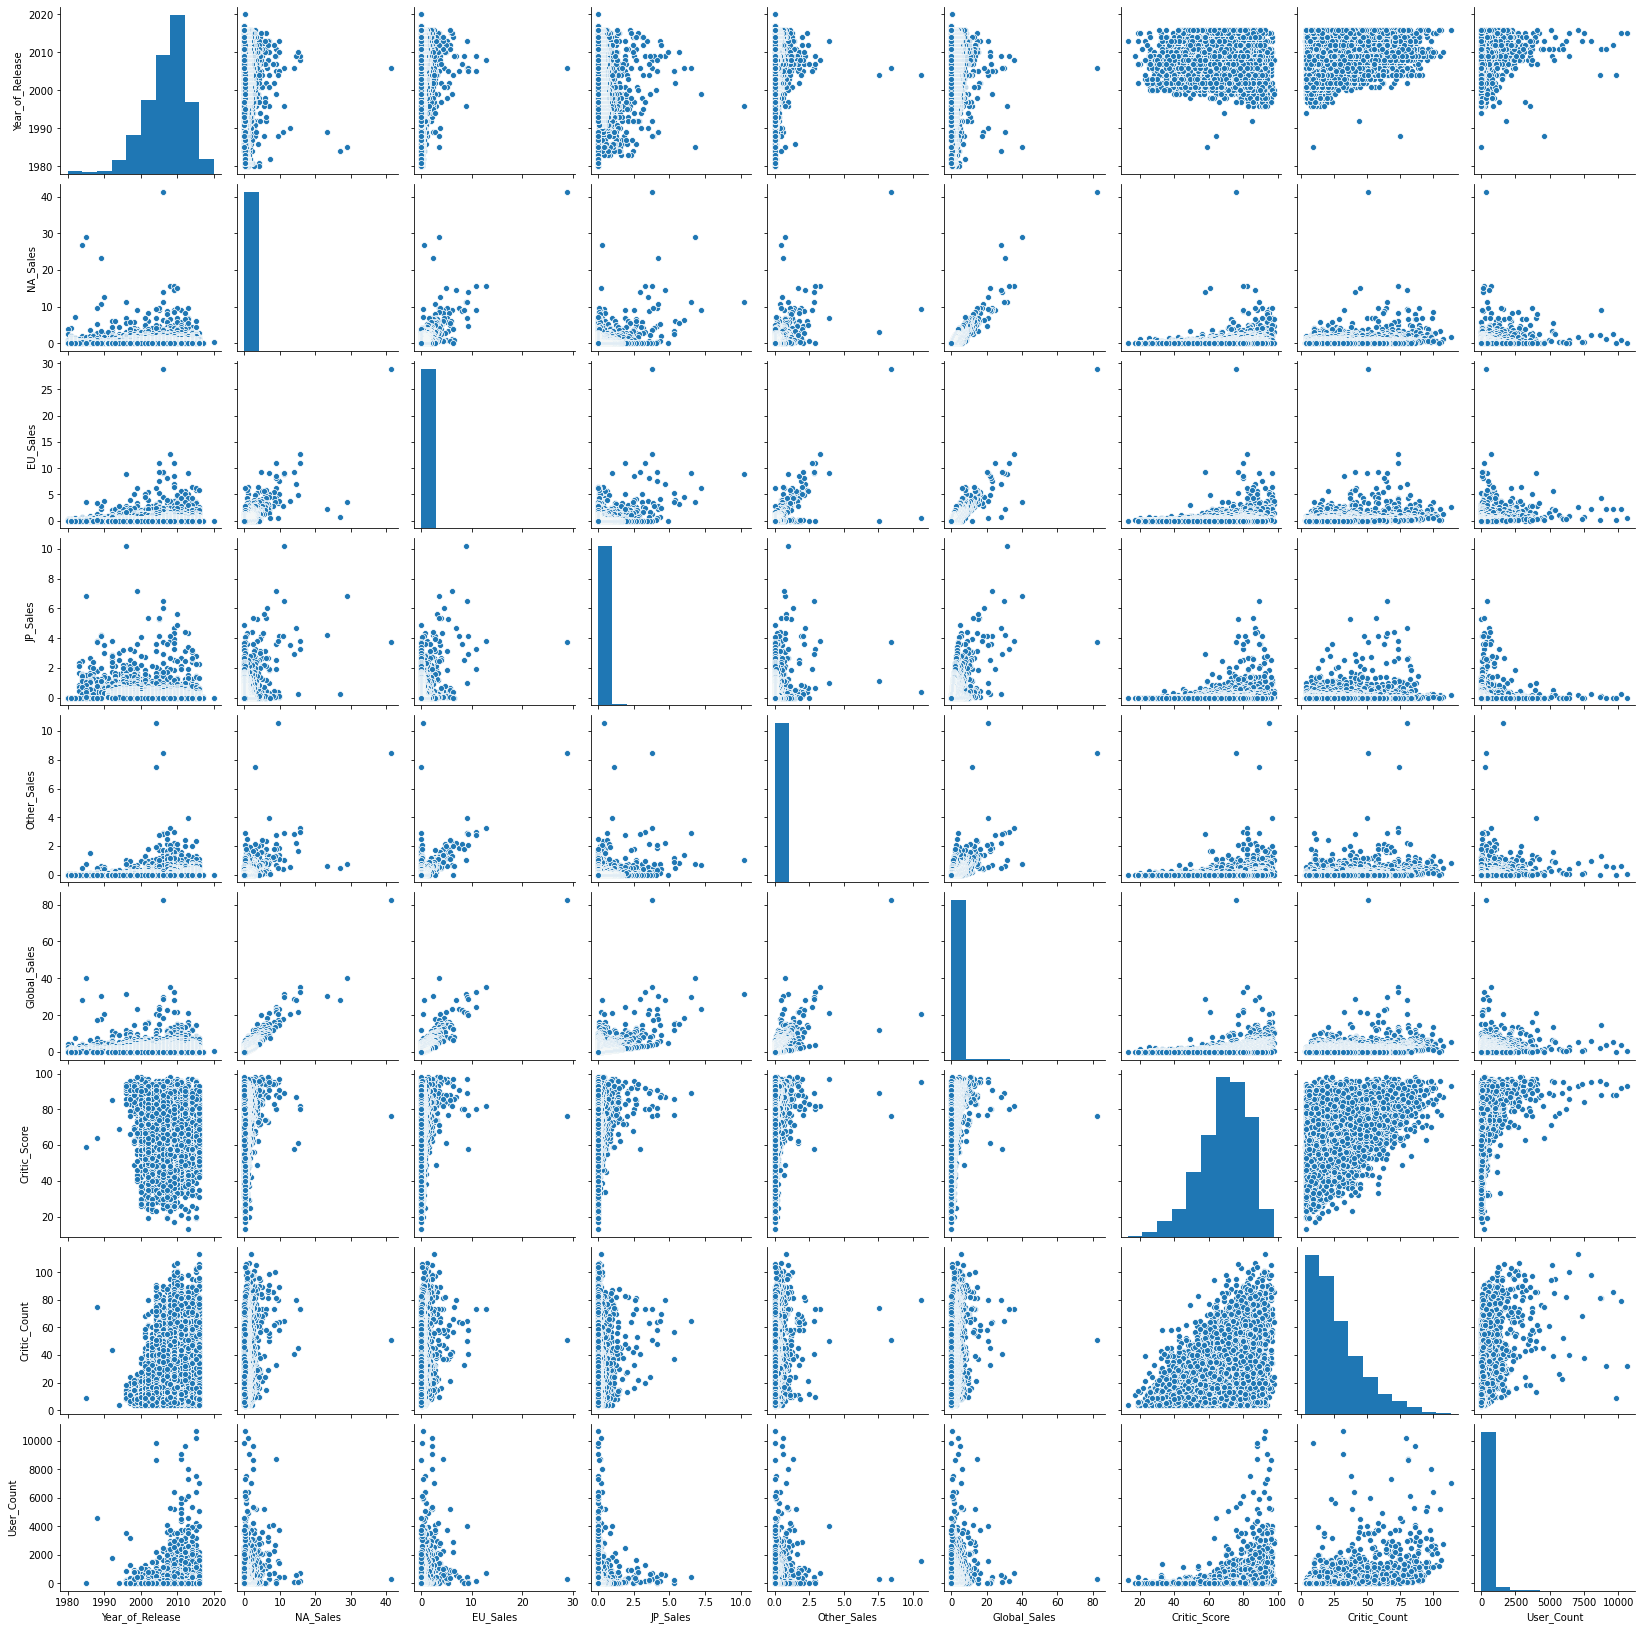

In [5]:
sns.pairplot(df)

### Correlated Region Sales and Global Sales.

<AxesSubplot:>

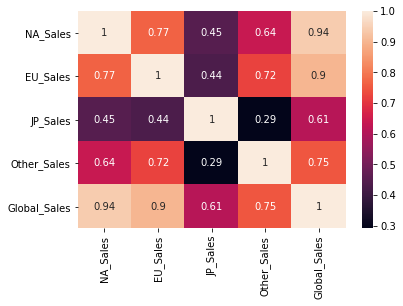

In [6]:
sns.heatmap(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr(),annot=True)

**Global sales are highly correlated with all sales over regions.

### Top 5 Platform Sales by Region.

**Japan Top 5 Platform Sales.

In [7]:
df.groupby(['Platform'])['JP_Sales'].sum().sort_values(ascending=False).nlargest(5)

Platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: JP_Sales, dtype: float64

<AxesSubplot:xlabel='Platform', ylabel='JP_Sales'>

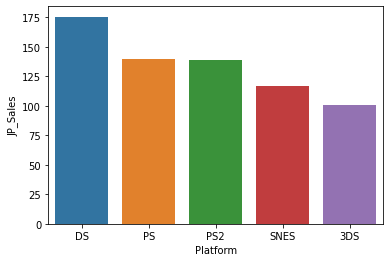

In [8]:
sns.barplot(y=df.groupby(['Platform'])['JP_Sales'].sum().sort_values(ascending=False).nlargest(5),x=df.groupby(['Platform'])['JP_Sales'].sum().sort_values(ascending=False).nlargest(5).index)

**NA Top 5 Platfrom Sales.

In [9]:
df.groupby(['Platform'])['NA_Sales'].sum().sort_values(ascending=False).nlargest(5)

Platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.67
Name: NA_Sales, dtype: float64

<AxesSubplot:xlabel='Platform', ylabel='NA_Sales'>

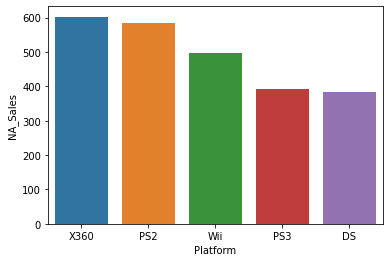

In [10]:
sns.barplot(y=df.groupby(['Platform'])['NA_Sales'].sum().sort_values(ascending=False).nlargest(5),x=df.groupby(['Platform'])['NA_Sales'].sum().sort_values(ascending=False).nlargest(5).index)

**EU Top 5 Platform Sales.

In [11]:
df.groupby(['Platform'])['EU_Sales'].sum().sort_values(ascending=False).nlargest(5)

Platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: EU_Sales, dtype: float64

<AxesSubplot:xlabel='Platform', ylabel='EU_Sales'>

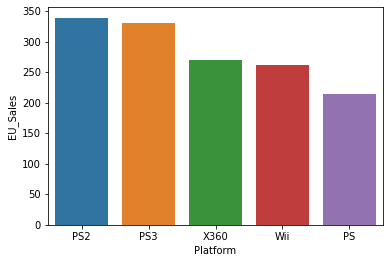

In [12]:
sns.barplot(y=df.groupby(['Platform'])['EU_Sales'].sum().sort_values(ascending=False).nlargest(5),x=df.groupby(['Platform'])['EU_Sales'].sum().sort_values(ascending=False).nlargest(5).index)

### User and Critics Count.

In [13]:
df[['Critic_Count','User_Count']].corr()

,Critic_Count,User_Count
Critic_Count,1.000000,0.362334
User_Count,0.362334,1.000000


In [14]:
df[['Critic_Count','User_Count']].corr(method='spearman')

,Critic_Count,User_Count
Critic_Count,1.000000,0.579064
User_Count,0.579064,1.000000


<AxesSubplot:xlabel='Critic_Count', ylabel='User_Count'>

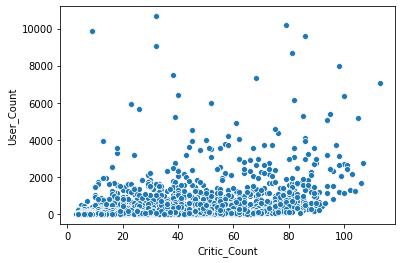

In [15]:
sns.scatterplot(y=df['User_Count'],x=df['Critic_Count'])

### Top 5 Genre

<AxesSubplot:ylabel='Genre'>

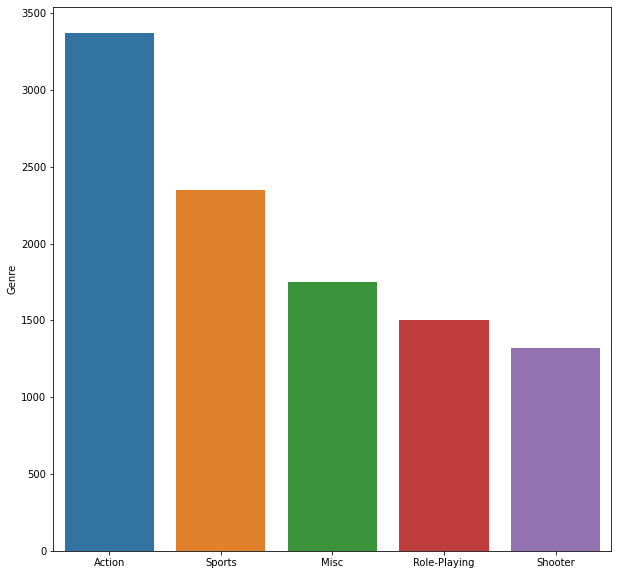

In [16]:
ax, fig = plt.subplots(figsize=(10,10))
sns.barplot(x=df['Genre'].value_counts().nlargest(5).index ,y=df['Genre'].value_counts().nlargest(5))

**Top most game genre, Action is the most highest count.

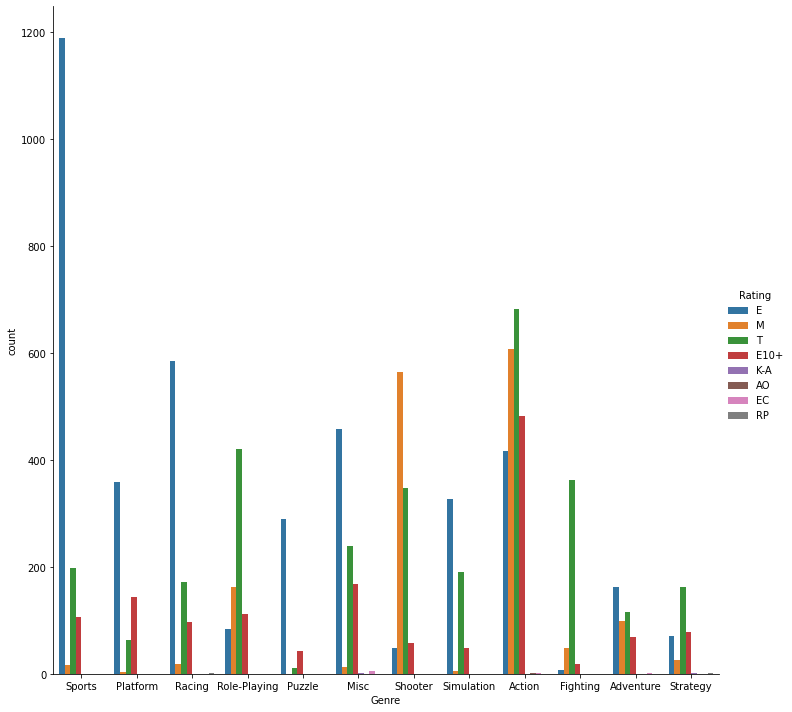

In [17]:
sns.catplot(x="Genre", hue="Rating", 
                 data=df, kind="count",
                 height=10);

**Genre Divided by Rating.

### Top 5 Publisher by Genre.

In [79]:
df.groupby('Genre')['Publisher'].apply(lambda x:x.value_counts().index[0])

Genre
Action                  Activision
Adventure             Idea Factory
Fighting        Namco Bandai Games
Misc                       Ubisoft
Platform                  Nintendo
Puzzle                    Nintendo
Racing             Electronic Arts
Role-Playing    Namco Bandai Games
Shooter                 Activision
Simulation                 Ubisoft
Sports             Electronic Arts
Strategy        Namco Bandai Games
Name: Publisher, dtype: object

In [107]:
pd.DataFrame(df.groupby(['Genre','Publisher']).size().reset_index().sort_values(0, ascending=False).drop_duplicates(['Genre'])).sort_values('Genre')

,Genre,Publisher,0
10,Action,Activision,311
322,Adventure,Idea Factory,83
495,Fighting,Namco Bandai Games,134
734,Misc,Ubisoft,159
812,Platform,Nintendo,112
915,Puzzle,Nintendo,74
995,Racing,Electronic Arts,159
1197,Role-Playing,Namco Bandai Games,153
1255,Shooter,Activision,162
1541,Simulation,Ubisoft,119
